In [3]:
import pandas as pd
import numpy as np

jnj = pd.read_csv('TAQ_JNJ_1004_1015_2010_trading_.csv', header = None)
jnj.head()

,0
0,date hour minute second price volume
1,20101004 6 25 15 61.7500 100
2,20101004 8 33 19 61.5600 100
3,20101004 8 41 09 61.5600 100
4,20101004 8 48 50 61.6000 100


Data is in one column in csv so we need to be seperated into individual fields (nearly 420,000 rows) 

In [4]:
#Date = 5-12
#Hour = 17-18
#Minute = 20-21
#Second = 23-24
#Price = 29-35
#Volume = 41-46

trade_data = {'Date':[], 'Hour':[], 'Minute':[], 'Second':[], 'Price':[], 'Volume':[]}

for row in range(1, len(jnj)):
    #print("percent complete " + str(row/len(jnj))) 
    string = str(jnj.iloc[row])
    end = string.index('N')
    trade_data['Date'].append(int(string[5:12]))
    trade_data['Hour'].append(int(string[17:19]))
    trade_data['Minute'].append(int(string[20:22]))
    trade_data['Second'].append(int(string[23:25]))
    trade_data['Price'].append(float(string[29:36]))
    trade_data['Volume'].append(int(string[40:end]))
    
    
    #expect this to take 15+ mins to execute

In [5]:
jnj_df = pd.DataFrame(trade_data)
print("JNJ trading Data")
print(jnj_df.describe())

JNJ trading Data
               Date           Hour         Minute          Price  \
count  4.195650e+05  419565.000000  419565.000000  419565.000000   
mean   2.010100e+06      12.214987      32.006225      63.051936   
std    4.998253e-01       2.146963      17.557812       0.588866   
min    2.010100e+06       5.000000       0.000000      61.300000   
25%    2.010100e+06      10.000000      17.000000      62.860000   
50%    2.010100e+06      12.000000      34.000000      63.195000   
75%    2.010101e+06      14.000000      47.000000      63.470000   
max    2.010101e+06      19.000000      59.000000      64.000000   

              Second        Volume  
count  419565.000000  4.195650e+05  
mean       28.922560  2.328804e+02  
std        17.562212  3.996851e+03  
min         0.000000  5.000000e+01  
25%        13.000000  1.000000e+02  
50%        29.000000  1.000000e+02  
75%        44.000000  2.000000e+02  
max        59.000000  1.601218e+06  


In [6]:
del(jnj)

Trim all transactions not in the standard trading window: 9:30am 4pm EST and save to CSV

In [7]:
jnj_df_open = jnj_df[(jnj_df['Hour'] >= 9) & (jnj_df['Hour'] < 16)]

selRows = jnj_df_open[(jnj_df_open['Hour'] == 9) & (jnj_df_open['Minute'] < 30)].index
jnj_df_open = jnj_df_open.drop(selRows, axis = 0)

jnj_df_open.to_csv('TAQ_JNJ_1004_1015_2010_trading_normal_hours.csv')

print(jnj_df_open.describe())

               Date           Hour         Minute          Price  \
count  4.188310e+05  418831.000000  418831.000000  418831.000000   
mean   2.010100e+06      12.214516      32.027157      63.051810   
std    4.998259e-01       2.142724      17.554689       0.588851   
min    2.010100e+06       9.000000       0.000000      61.300000   
25%    2.010100e+06      10.000000      17.000000      62.860000   
50%    2.010100e+06      12.000000      34.000000      63.195000   
75%    2.010101e+06      14.000000      47.000000      63.470000   
max    2.010101e+06      15.000000      59.000000      64.000000   

              Second        Volume  
count  418831.000000  4.188310e+05  
mean       28.928718  2.129001e+02  
std        17.560089  2.735795e+03  
min         0.000000  5.000000e+01  
25%        14.000000  1.000000e+02  
50%        29.000000  1.000000e+02  
75%        44.000000  2.000000e+02  
max        59.000000  1.601218e+06  


In [8]:
del(jnj_df)

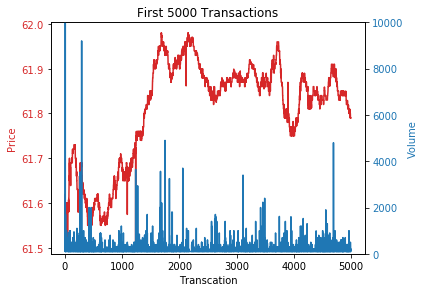

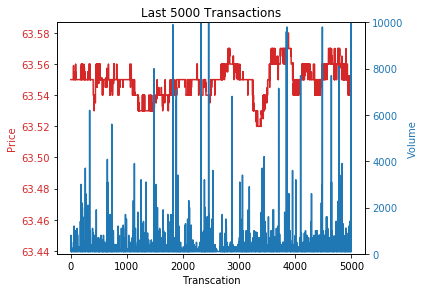

In [9]:
import matplotlib.pyplot as plt

first5000 = jnj_df_open.iloc[:5000,:]
last5000 = jnj_df_open.iloc[-5000:,:]

def plottransactions(df, title):
    t = np.arange(5000)
    price = np.array(df['Price'])
    volume = np.array(df['Volume'])
    
    fig, ax1= plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Transcation')
    ax1.set_ylabel('Price', color=color)
    ax1.plot(t, price, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx() #instantiate a second axes that shares the same x-axis
    
    color = 'tab:blue'
    ax2.set_ylabel('Volume', color=color)
    ax2.plot(t, volume, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0,10000)
    
    fig.tight_layout() #the right label y-lable is slightly cut off
    
    plt.title(title)
    plt.show()

plottransactions(first5000, "First 5000 Transactions")
plottransactions(last5000, "Last 5000 Transactions")


Transaction Change Analysis

Number of Transactions with a price change:
114776
% of Transactions: 
27.4%



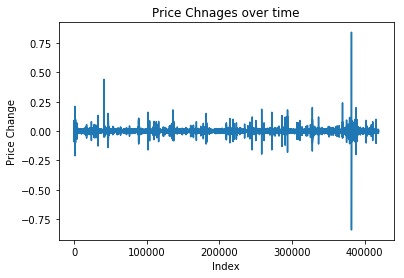

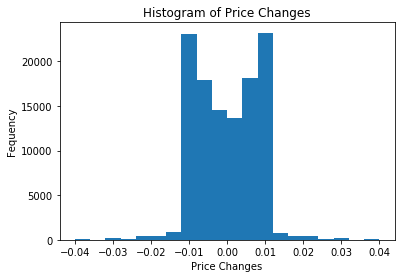

In [10]:
prices = jnj_df_open['Price'].values.tolist()
price_change = []

for i in range(len(prices)):
    if i == 0:
        pass
    else:
        price_change.append(prices[i] - prices[i-1])
        
print("Number of Transactions with a price change:")
count = 0 
price_changes_not0 = []
for i in price_change:
    if i !=0:
        count += 1
        price_changes_not0.append(i)
    
print(count)
print("% of Transactions: ")
print(str(round(count/len(price_change)*100,2))+"%")
print()

plt.plot(price_change)
plt.xlabel("Index")
plt.ylabel("Price Change")
plt.title("Price Chnages over time")
plt.show()

plt.hist(price_changes_not0, bins=20, range=[-.04,.04])
plt.xlabel("Price Changes")
plt.ylabel("Fequency")
plt.title("Histogram of Price Changes")
plt.show()

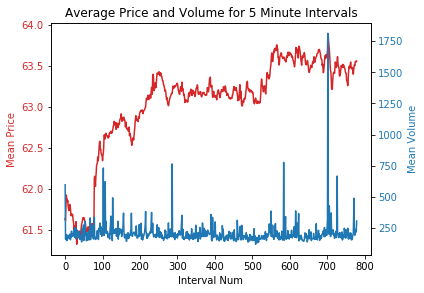

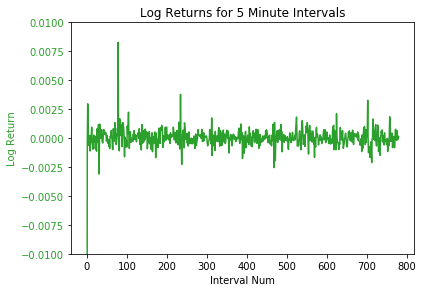

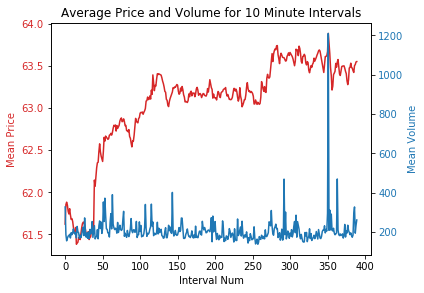

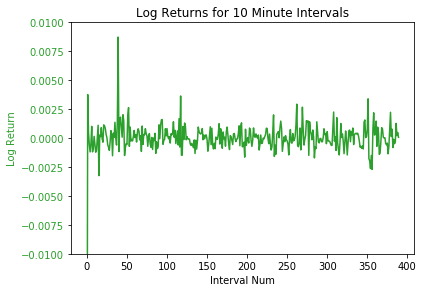

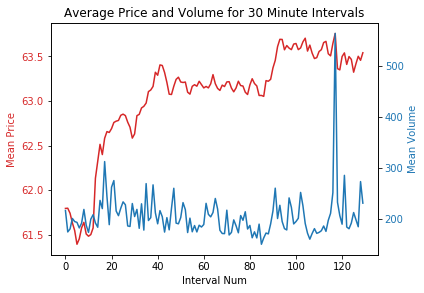

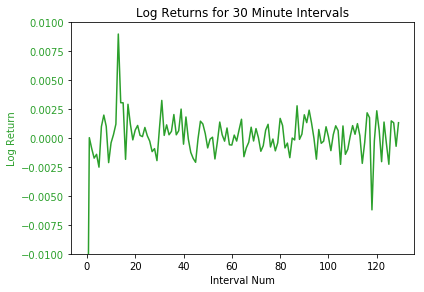

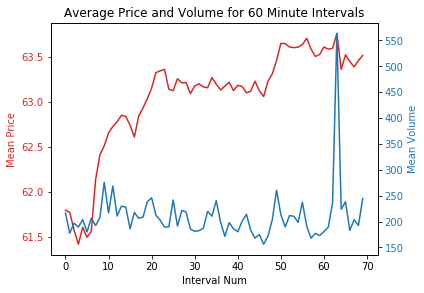

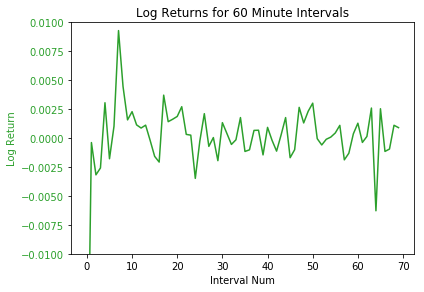

In [11]:
import math

def getintervals(minute, data):
    
    mod_fun = []
    
    for row in range(len(data)):
        mod_fun.append(data.iloc[row,2] % minute)
    
    interval_num = []
    n = 0

    for i in range(len(mod_fun)):
        if mod_fun[i] < mod_fun[i-1]:
            n += 1
        interval_num.append(n)
    
    data['Time Interval'] = interval_num
    
    meanprice = list(data.groupby(['Time Interval'])['Price'].mean())
    meanvol = list(data.groupby(['Time Interval'])['Volume'].mean())
    
    uval = []
    for i in range(len(meanprice)):
        uval.append(math.log(meanprice[i] / meanprice[i-1]))
    
    intervaldata = {'Mean Price': meanprice, 'Mean Vol': meanvol, 'Log Return': uval}
    intervaldf = pd.DataFrame(intervaldata)
    
    return intervaldf

def plotpricevol(df, title):
    t = np.arange(len(df))
    price = np.array(df['Mean Price'])
    volume = np.array(df['Mean Vol']) 
    
    fig, ax1 = plt.subplots()
    
    color = 'tab:red'
    ax1.set_xlabel('Interval Num')
    ax1.set_ylabel('Mean Price', color=color)
    ax1.plot(t, price, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    
    color = "tab:blue"
    ax2.set_ylabel('Mean Volume', color=color)
    ax2.plot(t, volume, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()
    
    plt.title(title)
    plt.show()
    
def plotlogreturns(df, title):
    t = np.arange(len(df))
    logret = np.array(df['Log Return'])

    fig, ax1 = plt.subplots()

    color = 'tab:green'
    ax1.set_xlabel('Interval Num')
    ax1.set_ylabel('Log Return', color=color)
    ax1.plot(t, logret, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(-.010,.010)

    fig.tight_layout()
    
    plt.title(title)
    plt.show()
    
#Plots and Save CSV
int5 = (getintervals(5, jnj_df_open))
plotpricevol(int5, "Average Price and Volume for 5 Minute Intervals")
plotlogreturns(int5, "Log Returns for 5 Minute Intervals")
int5.to_csv('TAQ_JNJ_1004_1015_2010_5_min_trading_unit.csv')

int10 = (getintervals(10, jnj_df_open))
plotpricevol(int10, "Average Price and Volume for 10 Minute Intervals")
plotlogreturns(int10, "Log Returns for 10 Minute Intervals")
int10.to_csv('TAQ_JNJ_1004_1015_2010_10_min_trading_unit.csv')

int30 = (getintervals(30, jnj_df_open))
plotpricevol(int30, "Average Price and Volume for 30 Minute Intervals")
plotlogreturns(int30, "Log Returns for 30 Minute Intervals")
int30.to_csv('TAQ_JNJ_1004_1015_2010_30_min_trading_unit.csv')

int60 = (getintervals(60, jnj_df_open))
plotpricevol(int60, "Average Price and Volume for 60 Minute Intervals")
plotlogreturns(int60, "Log Returns for 60 Minute Intervals")
int60.to_csv('TAQ_JNJ_1004_1015_2010_60_min_trading_unit.csv')